In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from itertools import cycle

![](http://)

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
zipcode_data = pd.read_csv("../input/irs-dataset/17zpallagi.csv")

In [3]:
#The dataset has coded column names so lets change it to something human could understand
columns_renamed = {
  "agi_stub": "Size of adjusted gross income",
  "N1" : "#_of_returns",
  "mars1" : "#_of_single_returns",
  "MARS2" : "#_of_joint_returns",
  "MARS4" : "# of head of household returns",
  "ELF" : "# of electronically filed returns",
  "CPREP" : "# of computer prepared paper returns",
  "PREP" : "# of returns with paid preparer's signature",
  "DIR_DEP" : "# of returns with direct deposit",
  "N2" : "# of exemptions",
  "NUMDEP" : "# of dependents",
  "TOTAL_VITA" : "Total # of volunteer prepared returns",
  "VITA" : "# of volunteer income tax assistance (VITA) prepared returns",
  "TCE" : "# of tax counseling for the elderly (TCE) prepared returns",
  "VITA_EIC" : "# of volunteer prepared returns with Earned Income Credit",
  "RAC" : "# of refund anticipation check returns",
  "ELDERLY" : "#of elderly returns",
  "A00100" : "Adjusted gross income",
  "N02650" : "# returns with total income",
  "A02650" : "Total income amount",
  "N00200" : "# of returns with salaries and wages",
  "A00200" : "Salaries and wages amount",
  "N00300" : "# of returns with taxable interest",
  "A00300" : "Taxable interest amount", 
  "N00600" : "# of returns with ordinary dividends ",
  "A00600" : "Ordinary dividends amount",
  "N00650" : "# of returns with qualified dividends",
  "A00650" : "Qualified dividends amount ",
  "N00700" : "# of returns with state and local income tax refunds",
  "A00700" : "State and local income tax refunds amount",
  "N00900" : "# of returns with business or professional net income (less loss)",
  "A00900" : "Business or professional net income (less loss) amount",
  "N01000" : "# of returns with net capital gain (less loss)",
  "A01000" : "Net capital gain (less loss) amount",
  "N01400" : "# of returns with taxable individual retirement arrangements distributions",
  "A01400" : "Taxable individual retirement arrangements distributions amount",
  "N01700" : "# of returns with taxable pensions and annuities",
  "A01700" : "Taxable pensions and annuities amount", 
  "SCHF" : "# of farm returns",
  "N02300" : "# of returns with unemployment compensation",
  "A02300" : "Unemployment compensation amount",
  "N02500" : "# of returns with taxable Social Security benefits",
  "A02500" : "Taxable Social Security benefits amount",
  "N26270" : "# of returns with partnership/S-corp net income (less loss)",
  "A26270" : "Partnership/S-corp net income (less loss) amount",
  "N02900" : "Number of returns with total statutory adjustments",
  "A02900" : "Total statutory adjustments amount",
  "N03220" : "# of returns with educator expenses",
  "A03220" : "Educator expenses amount",
  "N03300" : "# of returns with Self-employed (Keogh) retirement plans",
  "A03300" : "Self-employed (Keogh) retirement plans amount",
  "N03270" : "Number of returns with Self-employed health insurance deduction",
  "A03270" : "Self-employed health insurance deduction amount",
  "N03150" : "Number of returns with Individual retirement arrangement payments",
  "A03150" : "Individual retirement arrangement payments amount",
  "N03210" : "Number of returns with student loan interest deduction",
  "A03210" : "Student loan interest deduction amount",
  "N03230" : "Number of returns with tuition and fees deduction",
  "A03230" : "Tuition and fees deduction amount",
  "N03240" : "Returns with domestic production activities deduction",
  "A03240" : "Domestic production activities deduction amount",
  "N04470" : "Number of returns with itemized deductions",
  "A04470" : "Total itemized deductions amount",
  "A00101" : "Amount of AGI for itemized returns",
  "N17000" : "# of returns with Total medical and dental expense deduction",
  "A17000" : "Total medical and dental expense deduction amount",
  "N18425" : "# of returns with State and local income taxes",
  "A18425" : "State and local income taxes amount",
  "N18450" : "# of returns with State and local general sales tax",
  "A18450" : "State and local general sales tax amount",
  "N18500" : "# of returns with real estate taxes",
  "A18500" : "Real estate taxes amount",
  "N18800" : "Number of returns with Personal property taxes",
  "A18800" : "Personal property taxes amount",
  "N19300" : "# of returns with Home mortgage interest paid",
  "A19300" : "Home mortgage interest paid amount",
  "N19500" : "# of returns with Home mortgage from personal seller",
  "A19500" : "Home mortgage from personal seller amount",
  "N19530" : "# of returns with Deductible points",
  "A19530" : "Deductible points amount",
  "N19550" : "# of returns with Qualified Mortgage Insurance premiums",
  "A19550" : "Qualified Mortgage Insurance premiums amount",
  "N19570" : "# of returns with Investment interest paid",
  "A19570" : "Investment interest paid amount",
  "N19700" : "# of returns with Total charitable contributions",
  "A19700" : "Total charitable contributions amount",
  "N20800" : "# of returns with Net limited miscellaneous deduction",
  "A20800" : "Net limited miscellaneous deduction amount",
  "N20950" : "# of returns with Gambling loss deduction and other non-limited miscellaneous deduction",
  "A20950" : "Gambling loss deduction and other non-limited miscellaneous deduction amount",
  "N04800" : "# of returns with taxable income",
  "A04800" : "Taxable income amount",
  "N05800" : "# of returns with income tax before credits",
  "A05800" : "Income tax before credits amount",
  "N09600" : "# of returns with alternative minimum tax ",
  "A09600" : "Alternative minimum tax amount",
  "N05780" : "# of returns with excess advance premium tax credit repayment",
  "A05780" : "Excess advance premium tax credit repayment amount",
  "N07100" : "# of returns with total tax credits",
  "A07100" : "Total tax credits amount",
  "N07300" : "# of returns with foreign tax credit",
  "A07300" : "Foreign tax credit amount",
  "N07180" : "# of returns with child and dependent care credit",
  "A07180" : "Child and dependent care credit amount",
  "N07230" : "# of returns with nonrefundable education credit",
  "A07230" : "Nonrefundable education credit amount",
  "N07240" : "# of returns with retirement savings contribution credit",
  "A07240" : "Retirement savings contribution credit amount",
  "N07220" : "# of returns with child tax credit",
  "A07220" : "Child tax credit amount",
  "N0726" : "# of returns with residential energy tax credit",
  "A07260" : "Residential energy tax credit amount",
  "N09400" : "# of returns with self-employment tax",
  "A09400" : "Self-employment tax amount",
  "N85770" : "Number of returns with total premium tax credit",
  "A85770" : "Total premium tax credit amount",
  "N85775" : "# of returns with advance premium tax credit",
  "A85775" : "Advance premium tax credit amount",
  "N09750" : "# of returns with health care individual responsibility payment",
  "A09750" : "Health care individual responsibility payment amount",
  "N10600" : "# of returns with total tax payments",
  "A10600" : "Total tax payments amount",
  "N59660" : "# of returns with earned income credit",
  "A59660" : "Earned income credit amount",
  "N59720" : "# of returns with excess earned income credit",
  "A59720" : "Excess earned income credit (refundable) amount ",
  "N11070" : "# of returns with additional child tax credit",
  "A11070" : "Additional child tax credit amount",
  "N10960" : "# of returns with refundable education credit",
  "A10960" : "Refundable education credit amount",
  "N11560" : "# of returns with net premium tax credit",
  "A11560" :"Net premium tax credit amount",
  "N06500" : "# of returns with income tax",
  "A06500" : "Income tax amount",
  "N10300" : "# of returns with tax liability",
  "A10300" : "Total tax liability amount ",
  "N85530" : "# of returns with additional Medicare tax",
  "A85530" : "Additional Medicare tax amount",
  "N85300" : "Number of returns with net investment income tax",
  "A85300" : "Net investment income tax amount",
  "N11901" : "# of returns with tax due at time of filing",
  "A11901" : "Tax due at time of filing amount",
  "N11900" : "# of returns with total overpayments",
  "A11900" : "Total overpayments amount",
  "N11902" : "# of returns with overpayments refunded",
  "A11902" : "Overpayments refunded amount",
  "N12000" : "# of returns with credit to next year’s estimated tax",
  "A12000" : "Credited to next year’s estimated tax amount",
    }
zipcode_data.rename(columns=columns_renamed, inplace=True)

In [4]:
#let's clean up our newly renamed columns
zipcode_data.rename(columns=lambda x: x.strip(), inplace=True) #remove extra spaces at the beginning/end of each name
zipcode_data.rename(columns=lambda x: x.lower(), inplace=True) #lowecase column names
zipcode_data.rename(columns=lambda x: x.replace(" ", "_"), inplace=True) #replace white space with _ (python convention)

In [5]:
#let's see how big out dataset is
zipcode_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166537 entries, 0 to 166536
Columns: 153 entries, statefips to credited_to_next_year’s_estimated_tax_amount
dtypes: float64(149), int64(3), object(1)
memory usage: 202.5 MB


Our dataset is currently 202.5 MB! That's pretty big! We can reduce how much space this dataset occupies by optimizing the draframe memory footprint. 

Based on the information above printed out our dataset mostly contains quantiative values, 152 columns to be exact and only 1 object column. All quantitavely values are stored as either a float64 or int64 (8 bytes) which is excessive as some numbers don't need to occupy such space and could be stored in an int16 or float16 saving us space. under the hood, pandas represents numeric values as Numpy ndarrays, and stores them in a countinous block of memory. This sotrage model occupy less space and makes makes things faster by its ability to retreive values  quickly.

On the other hand, objects are stored as a pointer which is really just an address that takes you to where the value actually is making things much slower. 

Below is a helpful diagram to drive these concepts home.

![](https://imgur.com/5CjHmNK.png)


In [6]:
#execution time
for i in zipcode_data.columns[2:]:
    zipcode_data[i] = pd.to_numeric(zipcode_data[i], downcast="float")

#Let's see how big our dataset is compared to the 203MB before
zipcode_data.info(memory_usage="deep")    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166537 entries, 0 to 166536
Columns: 153 entries, statefips to credited_to_next_year’s_estimated_tax_amount
dtypes: float32(151), int64(1), object(1)
memory usage: 106.6 MB


In [7]:
#Lets inpect our column names
print(zipcode_data.columns.values)

['statefips' 'state' 'zipcode' 'size_of_adjusted_gross_income'
 '#_of_returns' '#_of_single_returns' '#_of_joint_returns'
 '#_of_head_of_household_returns' '#_of_electronically_filed_returns'
 '#_of_computer_prepared_paper_returns'
 "#_of_returns_with_paid_preparer's_signature"
 '#_of_returns_with_direct_deposit' '#_of_exemptions' '#_of_dependents'
 'total_#_of_volunteer_prepared_returns'
 '#_of_volunteer_income_tax_assistance_(vita)_prepared_returns'
 '#_of_tax_counseling_for_the_elderly_(tce)_prepared_returns'
 '#_of_volunteer_prepared_returns_with_earned_income_credit'
 '#_of_refund_anticipation_check_returns' '#of_elderly_returns'
 'adjusted_gross_income' '#_returns_with_total_income'
 'total_income_amount' '#_of_returns_with_salaries_and_wages'
 'salaries_and_wages_amount' '#_of_returns_with_taxable_interest'
 'taxable_interest_amount' '#_of_returns_with_ordinary_dividends'
 'ordinary_dividends_amount' '#_of_returns_with_qualified_dividends'
 'qualified_dividends_amount'
 '#_of_re

In [8]:
#normally we would like to know the dataset by quartiles shown by the describe function but this dataset is way too big
print(zipcode_data.describe())

           statefips        zipcode  size_of_adjusted_gross_income  \
count  166537.000000  166537.000000                  166537.000000   
mean       29.670314   48868.535156                       3.499883   
std        15.112958   27140.416016                       1.707903   
min         1.000000       0.000000                       1.000000   
25%        18.000000   27030.000000                       2.000000   
50%        29.000000   48876.000000                       3.000000   
75%        42.000000   70601.000000                       5.000000   
max        56.000000   99999.000000                       6.000000   

       #_of_returns  #_of_single_returns  #_of_joint_returns  \
count  1.665370e+05         1.665370e+05        1.665370e+05   
mean   1.797509e+03         8.568380e+02        6.466513e+02   
std    3.679481e+04         2.155984e+04        1.179978e+04   
min    0.000000e+00         0.000000e+00        0.000000e+00   
25%    7.000000e+01         0.000000e+00        4

In [9]:
#lets check for null value
print(zipcode_data.isnull().sum())

statefips                                                                                  0
state                                                                                      0
zipcode                                                                                    0
size_of_adjusted_gross_income                                                              0
#_of_returns                                                                               0
#_of_single_returns                                                                        0
#_of_joint_returns                                                                         0
#_of_head_of_household_returns                                                             0
#_of_electronically_filed_returns                                                          0
#_of_computer_prepared_paper_returns                                                       0
#_of_returns_with_paid_preparer's_signature                           

In [10]:
print(zipcode_data.dtypes)

statefips                                                                                    int64
state                                                                                       object
zipcode                                                                                    float32
size_of_adjusted_gross_income                                                              float32
#_of_returns                                                                               float32
#_of_single_returns                                                                        float32
#_of_joint_returns                                                                         float32
#_of_head_of_household_returns                                                             float32
#_of_electronically_filed_returns                                                          float32
#_of_computer_prepared_paper_returns                                                       float32
#_of_retur

From the step above we can se that state is a categorical variable that needs to be converted into a dummy variable.

ZIP codes with less than 100 returns and those identified as a single building or nonresidential ZIP code were categorized as “other” with the zipcode 99999. 

we not interested in the rows where zipcode is 0 or 99999 as it matches no zipcode in the world hence is useless and should be deleted. 

In [11]:
zipcode_data = zipcode_data[zipcode_data['zipcode'] !=0]
zipcode_data = zipcode_data[zipcode_data['zipcode'] !=99999] 

#we have some useless columns so let's drop them. They add no value whatsoever but simply 
#serve as way for the IRS to systematically store ifnormation

zipcode_data = zipcode_data.drop("statefips", axis=1) 
# The State Federal Information Processing System (FIPS) code which are publicly announced standards by the government to process
#documents

#For my own records, please ignore
#To dummy variable
#dummy = pd.get_dummies(zipcode_data["state"])
#dummy = dummy.apply(pd.to_numeric) #download float may be wrong
#zipcode_data = pd.concat([zipcode_data,dummy], axis=1)
#zipcode_data.head() #scroll all the way to the right to see the dummies

We got lucky that there are no missing values. If there were missing values there are several imputation techniques including:

- Replacing the missing value with the mean of that column
- Using regression to try to predict that value giving the other predictor variables available to us in the dataset
- There are many other imputation techniques depending on the dataset you have
- Additional things that would help us a null corelation heatmap and null matrix to make a more informaed decision


While we have a big dataset with over 153 columns, we only have features. We do not have a target value to predict. A good value to predict would simply be **how many icecream there is in a given zipcode** given the 153 features we have.

Let's first determine how many unique zipcodes we have, that way we only loop through the unique ones when gathering data from the API saving us a lot of time.

In [12]:
unique_rows = zipcode_data.nunique()["zipcode"] 
data_shape = zipcode_data.shape[0]
subtractions = data_shape - unique_rows

print("There are {first} rows in the dataset but only {second} unique zipcode rows".format(first=data_shape, second=unique_rows))

There are 165925 rows in the dataset but only 27658 unique zipcode rows


This is the start of our yelp collection data. What we try to do below is simply seperate the zipcodes that have 5 digits and the zipcodes that have 4. If the zipcode has 4 digits we will add a 0 to it in order for the yelp data to properly acknowledge it since digits must contain 5 digits.

In [13]:
zipcodes_with_five_digits = [] 
zipcodes_with_four_digits = []


def count_number(i):
    count = 0 
    while i > 0:
        i = i // 10
        count += 1
    return count
    
for i in zipcode_data["zipcode"]:
    number_of_digits = count_number(i)
    if number_of_digits == 5:
        zipcode = str(i)
        zipcodes_with_five_digits.append(zipcode)
    elif number_of_digits == 4:
        zipcode = str(i)
        zipcodes_with_four_digits.append("0{}".format(zipcode))

The below code finds grabs every zipcode from the zipcodes_with_five_digits and zipcodes_with_four_digits lists and returns how many ice cream there is in that zipcode 

It won't run as I made it into a text to not call the Yelp API every time we run this notebook + it won't work since I removed the API key.

API_KEY = "REPLACE WITH API KEY"
ENDPOINT = "https://api.yelp.com/v3/businesses/search"
HEADERS = {"Authorization": "bearer %s" %API_KEY}


icecream_count = {}
for i in zipcodes_with_five_digits: 
    #replace the above list with the with four digits zipcodes list once it runs through every item on this list
    number = str(i)
    PARAMETERS = {"term": "ice cream", "location": number}
    
    response = requests.get(url = ENDPOINT, params = PARAMETERS, headers = HEADERS)
    business_data = response.json() #now we have a dictionary
    

    icecream_count[number] = 0
    print(i)
    if 'businesses' in business_data.keys():
        for n in business_data["businesses"]:
            zipcode = n["location"]["zip_code"]
            if zipcode == number:
                icecream_count[number] += 1


final_df = pd.DataFrame.from_dict(icecream_count, orient="index")
final_df.reset_index(level=0, inplace=True)
final_df.to_csv("/Users/yhernandezpascual1/Desktop/icecream.csv") # exports it to my deskptop while I sleep :)

The yelp data needs to be configured to fit every zipcode. By inspecting the raw dataset downloaded for the IRS dataset you will notice that the zipcode appears multiple tiems since each zipcode appears 6 times (for 6 ranges of income per zipcode)

Remember above we isolated the unique zipcode as opposed to repeating the zipcodes multiple times to speed up our data collection process. There are 166537 rows in the dataset but only 27660 unique rows

In [14]:
from collections import Counter
icecream_data = pd.read_csv("../input/icecream-data/icecream_data.csv")

#icecream_data = pd.concat([icecream_data]*6, ignore_index=True, sort=True)
icecream_data.sort_values(by=["Zipcode"], inplace=True)
icecream_data.rename(columns={"Zipcode":"zipcode", "count":"icecream_count"}, inplace=True)

print(icecream_data.shape)
print(zipcode_data.shape)

(27660, 2)
(165925, 152)


Let's now merge the original IRS dataset with the new YELP dataset we collected using the yelp api that tells us how many ice cream shops there is per zipcode (our target variable).

You'll notice that above there is mismatch in that the orignal dataset has 165925 rows but the icecream dataset contianing icecream shops per zipcode contains 165960. This difference in rows is simply because we assumed that every zipcode repeats itself 6 times because of different incomes levels, however, there are some (outliers) that only contain 5.

This difference once we merge it.

In [15]:
merged_dataset = pd.merge(zipcode_data, icecream_data, how="inner", on="zipcode").reindex()

print(merged_dataset.columns)
print(merged_dataset.shape) 



Index(['state', 'zipcode', 'size_of_adjusted_gross_income', '#_of_returns',
       '#_of_single_returns', '#_of_joint_returns',
       '#_of_head_of_household_returns', '#_of_electronically_filed_returns',
       '#_of_computer_prepared_paper_returns',
       '#_of_returns_with_paid_preparer's_signature',
       ...
       'net_investment_income_tax_amount',
       '#_of_returns_with_tax_due_at_time_of_filing',
       'tax_due_at_time_of_filing_amount',
       '#_of_returns_with_total_overpayments', 'total_overpayments_amount',
       '#_of_returns_with_overpayments_refunded',
       'overpayments_refunded_amount',
       '#_of_returns_with_credit_to_next_year’s_estimated_tax',
       'credited_to_next_year’s_estimated_tax_amount', 'icecream_count'],
      dtype='object', length=153)
(165925, 153)


In [16]:
#lets inspect our new dataset
merged_dataset.head()

state  zipcode  size_of_adjusted_gross_income  #_of_returns  \
0    AL  35004.0                            1.0        1500.0   
1    AL  35004.0                            2.0        1340.0   
2    AL  35004.0                            3.0         920.0   
3    AL  35004.0                            4.0         650.0   
4    AL  35004.0                            5.0         650.0   

   #_of_single_returns  #_of_joint_returns  #_of_head_of_household_returns  \
0                970.0               220.0                           290.0   
1                670.0               350.0                           280.0   
2                330.0               430.0                           140.0   
3                110.0               480.0                            50.0   
4                 60.0               570.0                            20.0   

   #_of_electronically_filed_returns  #_of_computer_prepared_paper_returns  \
0                             1340.0                                  80.0   
1                             1210.0                                  80.0   
2                              850.0                                  40.0   
3                              600.0                                  30.0   
4                              600.0                                  40.0   

   #_of_returns_with_paid_preparer's_signature  \
0                                        670.0   
1                                        590.0   
2                                        420.0   
3                                        310.0   
4                                        350.0   

   #_of_returns_with_direct_deposit  #_of_exemptions  #_of_dependents  \
0                            1090.0           2170.0            700.0   
1                            1020.0           2460.0            790.0   
2                             680.0           1990.0            630.0   
3                             450.0           1660.0            540.0   
4                             380.0           1860.0            640.0   

   total_#_of_volunteer_prepared_returns  \
0                                   50.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   #_of_volunteer_income_tax_assistance_(vita)_prepared_returns  \
0                                               50.0              
1                                                0.0              
2                                                0.0              
3                                                0.0              
4                                                0.0              

   #_of_tax_counseling_for_the_elderly_(tce)_prepared_returns  \
0                                                0.0            
1                                                0.0            
2                                                0.0            
3                                                0.0            
4                                                0.0            

   #_of_volunteer_prepared_returns_with_earned_income_credit  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   #_of_refund_anticipation_check_returns  #of_elderly_returns  \
0                                   340.0                360.0   
1                                   310.0                270.0   
2                                   190.0                200.0   
3                                   110.0                130.0   
4                                    80.0                140.0   

   adjusted_gross_income  #_returns_with_total_income  total_income_amount  \
0             

Let's try to do some visualizations with our new merged dataset.

Keep in mind that the dataset is aggregated at the zipcode level. For example who has 700 kids? a specific zipcode does which now makes it reasonable. 

In [17]:
merged_dataset["icecream_count"].value_counts().to_frame().style.bar()

Text(0, 0.5, 'Frequency')

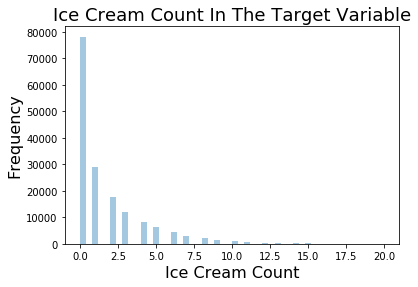

In [18]:
import seaborn as sns
sns.distplot(merged_dataset["icecream_count"], kde=False)

plt.title('Ice Cream Count In The Target Variable', fontsize=18)
plt.xlabel('Ice Cream Count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)


In [19]:
merged_dataset["size_of_adjusted_gross_income"].value_counts().to_frame().style.bar()

In [20]:
merged_dataset["#_of_dependents"].value_counts().to_frame().style.bar()

In [21]:
merged_dataset["#_of_returns_with_real_estate_taxes"].value_counts().to_frame().style.bar()

In [22]:
merged_dataset["real_estate_taxes_amount"].value_counts().to_frame().style.bar()

In [23]:
merged_dataset["#_of_returns_with_unemployment_compensation"].value_counts().to_frame().style.bar()

In [24]:
merged_dataset["#of_elderly_returns"].value_counts().to_frame().style.bar()

In [25]:
merged_dataset["state"].value_counts().to_frame().style.bar()
#print(52938+32916+20586+17550+14064+10500+9408+3319+1980+1872+792) for my own records

Takes to long, so for testing purposes marked down (text)

columns = list(merged_dataset.columns.values)
fig = plt.figure(figsize=(20,45))
for i in range(len(columns)):
    #i = i+1
    ax = fig.add_subplot(76,2,(i+1))
    ax.hist(merged_dataset[columns[i]])
    ax.set_title(str(columns[i]))
    #fig.tight_layout()
    #plt.subplot_tool()
    fig.subplots_adjust(top=2, hspace=2, wspace=2)

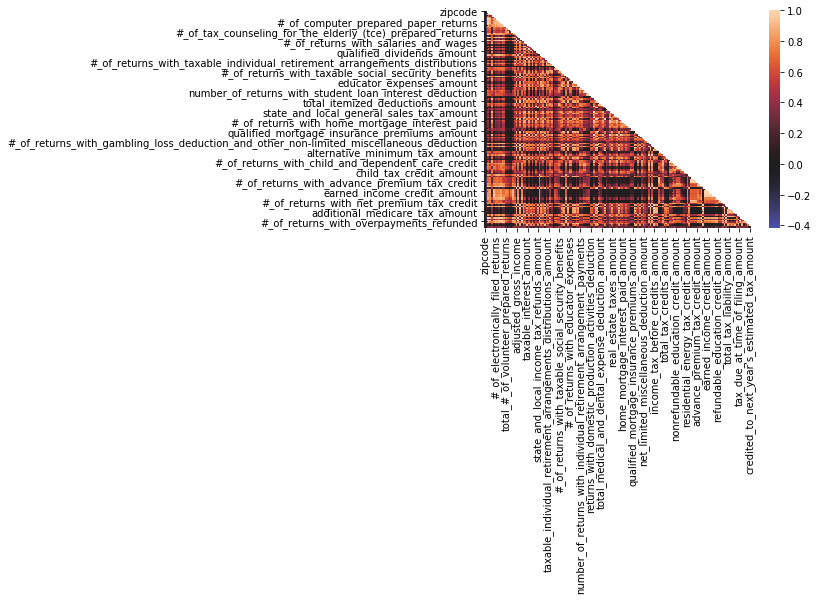

In [26]:
corr = merged_dataset.corr()
corr_mask = np.triu(np.ones_like(corr, dtype=bool))
#cmap = sns.diverging_palette(h_neg=20, h_pos=240, as_cmap=True)
sns.heatmap(merged_dataset.corr(), center=0, mask=corr_mask)
plt.show()  

Above we tried to draw correlations between columns in the dataset but its too big to analyze. 

Usually when having too much column it tends to oversit so let's remove columns that we see not much chaage within.

In [27]:
sel = VarianceThreshold(threshold=0.05)
merged_dataset_variance = merged_dataset.drop("state", axis=1)

sel.fit(merged_dataset_variance / merged_dataset_variance.mean()) #normalizing it 
mask = sel.get_support()
zipcode_reduced = merged_dataset_variance.loc[:, mask]
print(zipcode_reduced.shape)
print(merged_dataset_variance.shape)
#merged_dataset.shape

#No column dropped....

(165925, 152)
(165925, 152)


In [28]:
#Lets export to analyze more in tableau
#merged_dataset.to_csv("/Users/yhernandezpascual1/Desktop/merged_dataset.csv")

In [61]:
x = merged_dataset.drop(["state", "zipcode", "icecream_count"], axis=1)
y = merged_dataset.loc[:,["icecream_count"]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25, random_state=7)

# ** Please ignore, this is for my own records **
#to be delete

#Rememebr states are dummy varibales so don't need to standardized since they are either 0 and 1 
#as opposed to other columns that range from 0 to thousands 

dummy_x_train = x_train.iloc[:,151:]
dummy_x_test = x_test.iloc[:,151:]

Let's standardize the data in a way that the mean is zero and the standard deviation is 1 for optimal performance. This is because we don't want certain predictor variables to overshadow others. For example, if predicting how much a house is worth, the LotArea are much bigger values than bedrooms giving bedroom an unfair advantage. Remember many algorithms like knn rely on eucledian distance making the distance be goverbed by this feature so we need to level the plain field.

In [62]:
scaler = StandardScaler()
scaler.fit(x_train)

#now lets transform both the training and test sets
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#my own records below, please ignore
#lets combine our standardized columns with our dummy variables
# to be deleted
#x_train = pd.concat([x_train, dummy_x_train], axis=1)
#x_test = pd.concat([x_test, dummy_x_test], axis=1)

We will use Dimentionality **Reduction to reduce** the 152 columns we have on this dataset while still ensuring important information are conveyed

Instead of relying on gut feeling (more data driven approach),we will first determine what is the optimal level of components used using an elbow chart to determine at which points does the explained variance ratio starts to decrease at a decreasing rate.

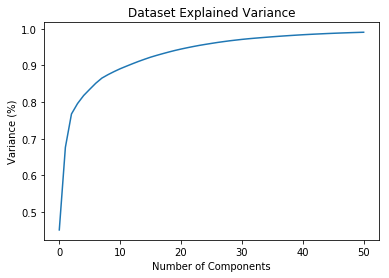

Explained variation per principal component: [0.45093085 0.6762442  0.76734058 0.79587723 0.81771872 0.83476635
 0.851374   0.86530791 0.87469188 0.88305955 0.89080553 0.8976194
 0.90431729 0.91075926 0.91671444 0.92241526 0.92736951 0.93203842
 0.93651932 0.94074329 0.94457667 0.9481085  0.95143298 0.9545547
 0.95735935 0.96000622 0.96259098 0.9648999  0.96711814 0.96904614
 0.97093667 0.97258216 0.9740452  0.97542484 0.97675983 0.97806177
 0.97929411 0.9804563  0.98155991 0.98260505 0.98361093 0.98449358
 0.9853361  0.98611785 0.98688057 0.987582   0.98822514 0.98882554
 0.9894128  0.98994692 0.99045074]


In [63]:
#now lets put our PCA into action
scaler_visual = StandardScaler().fit_transform(x)
pca = PCA(n_components=.99)
pca.fit(scaler_visual)


plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_.cumsum()))
#output:1 component explain 59.17% of the variance in the data, 2 components explain 81.55% of the variance in the data ....


In [64]:
#from the graph above we see that 20 components will get us to above the 90% general good rule of thumb
#variance threshold

pca = PCA(n_components=20)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)


Let's start using models. First We'll start with 
# **Multinomial Logistic Regression**!

In [33]:
#lets train our data with logistic regression
#we will use logistic regressions default parameters but will only change the default solver since its too slow

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logisticReg = LogisticRegression(solver="saga", multi_class="multinomial")
logisticReg.fit(x_train_pca, y_train.values.ravel())
y_prediction = logisticReg.predict(x_test_pca)


#merics

#How accurate
print("Accuracy:",metrics.accuracy_score(y_test, y_prediction))
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_prediction, digits=3))

KeyboardInterrupt: 

Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)
df_confusion = pd.DataFrame(confusion_matrix)
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(df_confusion, annot=True, linewidths=.5, ax=ax)
sns.set(font_scale=1.4)

# **Linear Regression**

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
linearRegression.fit(x_train, y_train)
y_prediction = linearRegression.predict(x_test)



print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction))) 
print('Accuracy:',linearRegression.score(x_test, y_test)) 



#To make a dataframe that contains the actual and predicted values and then plot them we first need to transforms the data into lists

actual = y_test["icecream_count"].values
y_prediction_regression = []
for i in y_prediction:
    for k in i:
        y_prediction_regression.append(k)
        
df = pd.DataFrame({"Predict": y_prediction_regression, "Actual": actual})
df.head(25)

df.plot(kind="bar", figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. Basically, the wisdoms of crowds will allow for a pwoerful prediction.

![](https://imgur.com/NUcSKcm.png)

**We'll start with Random Forest Regression**

In [99]:
#need to convert from list to array -> change this on top to cover all algorithms
#random forest try to change how many columns are considered for boostrap dataset
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import roc_auc_score


#features
train_features = np.array(x_train_pca)
test_features = np.array(x_test_pca)

#target 
train_target = np.array(y_train)
test_target = np.array(y_test)

# Instantiate model with 100 decision trees
random_forest = RandomForestRegressor(n_estimators=100, bootstrap = True,
                               max_features = 'sqrt', random_state=7)
random_forest.fit(train_features, train_target.ravel())
random_forest_predictions = random_forest.predict(test_features)

#confusion_matrix = metrics.confusion_matrix(test_target, random_forest_predictions)
#print("Accuracy:",metrics.accuracy_score(test_target, random_forest_predictions))

print('Mean Squared Error:', metrics.mean_squared_error(test_target, random_forest_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_target, random_forest_predictions)))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_target, random_forest_predictions))  
print('R^2:',random_forest.score(test_features, test_target))

#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Mean Squared Error: 3.797911709370824
Root Mean Squared Error: 1.9488231601073567
Mean Absolute Error: 1.2255009362202438
R^2: 0.4066960922462829


In [100]:
# Get numerical feature importances
importance = random_forest.feature_importances_
feature_list = list(x.columns)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance,2)) for feature,importance in zip(feature_list, importance)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print out the feature and importances 
[print("Variable: {:20}\n importance: {} \n".format(*pair)) for pair in feature_importances];
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Variable: size_of_adjusted_gross_income
 importance: 0.14 

Variable: #_of_single_returns 
 importance: 0.08 

Variable: #_of_electronically_filed_returns
 importance: 0.08 

Variable: #_of_returns        
 importance: 0.07 

Variable: #_of_joint_returns  
 importance: 0.06 

Variable: #_of_head_of_household_returns
 importance: 0.06 

Variable: #_of_computer_prepared_paper_returns
 importance: 0.04 

Variable: #_of_returns_with_paid_preparer's_signature
 importance: 0.04 

Variable: #_of_returns_with_direct_deposit
 importance: 0.04 

Variable: #_of_exemptions     
 importance: 0.04 

Variable: #_of_dependents     
 importance: 0.04 

Variable: total_#_of_volunteer_prepared_returns
 importance: 0.04 

Variable: #_of_volunteer_income_tax_assistance_(vita)_prepared_returns
 importance: 0.04 

Variable: #_of_refund_anticipation_check_returns
 importance: 0.04 

Variable: adjusted_gross_income
 importance: 0.04 

Variable: total_income_amount 
 importance: 0.04 

Variable: #_of_tax_counse

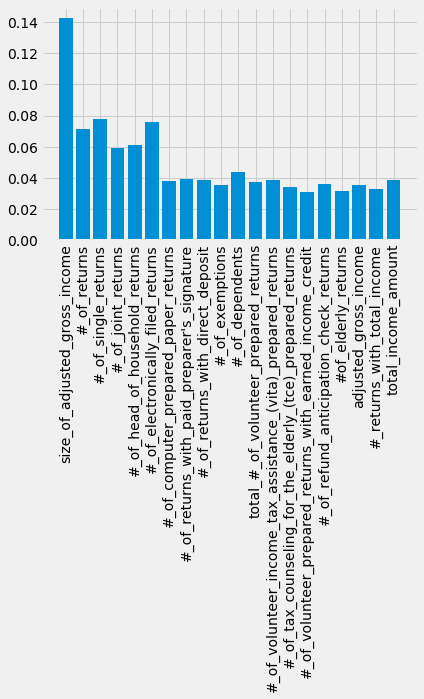

In [101]:
# Set the style
plt.style.use("fivethirtyeight")
x_values = list(range(len(importance)))

# Make a barchart
plt.bar(x_values, importance, orientation="vertical")
plt.xticks(x_values, feature_list, rotation="vertical");


# Random Forest Classification

In [107]:
#need to convert from list to array -> change this on top to cover all algorithms
#random forest try to change how many columns are considered for boostrap dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score


#features
train_features = np.array(x_train_pca)
test_features = np.array(x_test_pca)

#target 
train_target = np.array(y_train)
test_target = np.array(y_test)

# Instantiate model with 100 decision trees
random_forest = RandomForestClassifier(n_estimators=100, bootstrap = True,
                               max_features = 'sqrt', random_state=7)
random_forest.fit(train_features, train_target.ravel())
random_forest_predictions = random_forest.predict(test_features)

confusion_matrix = metrics.confusion_matrix(test_target, random_forest_predictions)
print("Precision = {}".format(precision_score(test_target, random_forest_predictions, average='macro')))
print("Recall = {}".format(recall_score(test_target, random_forest_predictions, average='macro'))) # Recall is the same as sensitivity - Of all the actual positives/TRUEs/1s, how many were classified/predicted correctly , # Ability of the model to class if record positively.
print("Accuracy = {}".format(accuracy_score(test_target, random_forest_predictions)))
print("F1 Score = {}".format(f1_score(test_target, random_forest_predictions, average='macro'))) #It is the harmonic mean(average) of the precision and recall.


Precision = 0.09277944684964709
Recall = 0.07924727480106028
Accuracy = 0.4969625379682754
F1 Score = 0.0786788026260177


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
# Get numerical feature importances
importance = random_forest.feature_importances_
feature_list = list(x.columns)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance,2)) for feature,importance in zip(feature_list, importance)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print out the feature and importances 
[print("Variable: {:20}\n importance: {} \n".format(*pair)) for pair in feature_importances];
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Variable: size_of_adjusted_gross_income
 importance: 0.1 

Variable: #_of_single_returns 
 importance: 0.07 

Variable: #_of_returns        
 importance: 0.06 

Variable: #_of_electronically_filed_returns
 importance: 0.06 

Variable: #_of_joint_returns  
 importance: 0.05 

Variable: #_of_head_of_household_returns
 importance: 0.05 

Variable: #_of_returns_with_direct_deposit
 importance: 0.05 

Variable: #_of_dependents     
 importance: 0.05 

Variable: #_of_tax_counseling_for_the_elderly_(tce)_prepared_returns
 importance: 0.05 

Variable: #_of_computer_prepared_paper_returns
 importance: 0.04 

Variable: #_of_returns_with_paid_preparer's_signature
 importance: 0.04 

Variable: #_of_exemptions     
 importance: 0.04 

Variable: total_#_of_volunteer_prepared_returns
 importance: 0.04 

Variable: #_of_volunteer_income_tax_assistance_(vita)_prepared_returns
 importance: 0.04 

Variable: #_of_volunteer_prepared_returns_with_earned_income_credit
 importance: 0.04 

Variable: #_of_refund

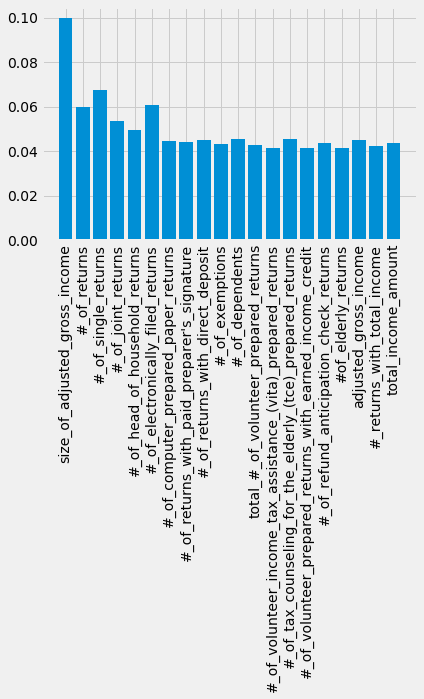

In [109]:
# Set the style
plt.style.use("fivethirtyeight")
x_values = list(range(len(importance)))

# Make a barchart
plt.bar(x_values, importance, orientation="vertical")
plt.xticks(x_values, feature_list, rotation="vertical");

# AdaBoost

AdaBoost can be used to improve the accuracy of your weak classifiers hence making it flexible. It has now being extended beyond binary classification and has found use cases in text and image classification as well.

A few Disadvantages of AdaBoost are:

Boosting technique learn progressively, therefore is important to ensure that you have quality data. AdaBoost is also extremely sensitive to Noisy data and outliers.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#We use max_depth=1 is used to tell our model that we’d like our forest to be composed of trees with a single decision node and two leaves (A stump). 
#n_estimators is used to specify the total number of trees in the forest.
adaBoostClasifier = AdaBoostClassifier(n_estimators=200, learning_rate=0.3)
adaBoostmodel = adaBoostClasifier.fit(x_train_pca, y_train.values.ravel())

y_prediction = adaBoostmodel.predict(x_test_pca)
print("Accuracy:", metrics.accuracy_score(y_test.values.ravel(), y_prediction))

#The main parameters to tune to obtain good results are n_estimators, complexity of the base estimators e.g., its depth max_depth or minimum required number of samples at a leaf min_samples_leaf in case of decision trees



If we stick to a Decision Tree Classifier of depth 1 (a stump), here’s how to implement AdaBoost classifier 

So Adaboost is composed of a series of decision trees with a depth of 1, a stump. we have low accuracy, this could be largely improved. One of the key parameters is the depth of the sequential decision tree classifiers. How does accuracy improve with depth of the decision trees ?


In [ ]:
scores = []
for depth in [1,2,3,4,5,10] : 
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth))
    ada_model = ada.fit(x_train, y_train.values.ravel())
    y_prediction = ada_model.predict(x_test)
    score = metrics.accuracy_score(y_test.values.ravel(), y_prediction)
    scores.append(score)
print(scores)
# wow seems like

From our analysis above, it seems like a tree with a depth of two gives us the biggest accuracy at : .48474036931681214

# Using Different Base Learners

Let's now use SVC as a base estimator instead of decision trees. You can use any ML learner as base estimator if it accepts sample weight such as Decision Tree, Support Vector Classifier. 

Commented it out since it takes so long

In [ ]:
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVC

#svc = SVC(probability=True, kernel="linear")
#adaBoost_svc = AdaBoostClassifier(n_estimators=50, learning_rate=1, base_estimator=svc)

#adaBoost_svc_model = adaBoost_svc.fit(x_train, y_train.values.ravel())
#y_prediction = adaBoost_svc_model.predict(x_test)

#print("Accuracy:", metrics.accuracy_score(y_test.values.ravel(), y_prediction))

# XGboost

Gradient Boosting specifically is an approach where new models are trained to predict the residuals (i.e errors) of prior models, it's a little more complex (comes along with more customizable parameters as a result) XGBoost is alsofaster algorithm than AdaBoost. In complex and high-dimension problems XGBoost works better, given our complex dataset it's no wonder it performs much better.

It's important to highlight that both of these methods are built based on the idea of converting weak learners to a strong learner by updating based on the residuals (XGBoost) or misclassifications (AdaBoost).

![](https://imgur.com/urprHT5.png)

In order for XGBoost to be able to use our data, we’ll need to transform it into a specific format that XGBoost can handle. That format is called DMatrix. It’s a very simple one-linear to transform a numpy array of data to DMatrix format:


In [ ]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score


# Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.
d_train = xgb.DMatrix(data=x_train, label=y_train, feature_names = x.columns)
d_test = xgb.DMatrix(data=x_test, label=y_test, feature_names = x.columns)


#parameters obtained after hyperparameter tuning below 

params = {'colsample_bytree': 0.6137981258031604, 'gamma': 1.2633865918027753, 'max_depth': 9, 'min_child_weight': 7.0, 
                'reg_alpha': 44.0, 'reg_lambda': 0.5477051451566189}



steps = 20  #The number of training iterations
xgb_model = xgb.train(params, d_train, steps)
predictions = xgb_model.predict(d_test)
best_predictions = np.asarray([np.argmax(line) for line in predictions])
        

print("Precision = {}".format(precision_score(y_test, best_predictions, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_predictions, average='macro'))) # Recall is the same as sensitivity - Of all the actual positives/TRUEs/1s, how many were classified/predicted correctly , # Ability of the model to class if record positively.
print("Accuracy = {}".format(accuracy_score(y_test, best_predictions)))
#print("F1 Score = {}".format(f1_score(y_test, best_predictions))) #It is the harmonic mean(average) of the precision and recall.


In [ ]:
#takes forever

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


scaler = StandardScaler()
scaler.fit(x)
new_x = scaler.transform(x)


pca2 = PCA(n_components=20)
pca2.fit(new_x)
x2 = pca2.transform(new_x)


model = xgb.XGBClassifier(params)
kfold = KFold(n_splits=10)
results = cross_val_score(model, x2, y.values.ravel(), cv=kfold)
print("Accuracy: %.2f%%, standard deviation: (%.2f%%)" % (results.mean()*100, results.std()*100))

We have many classes for this classification  modeling problem and the classes are imbalanced (there are a lot more instances for one class than another). Therefore, its a good idea to create stratified folds when performing cross validation since it enforces class distribution.

Otherwise k-fold is generally the gold standard for most problems.

In [ ]:
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, x2, y, cv=kfold)
print("Accuracy: %.2f%%, standard deviation: (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
xgb.plot_importance(xgb_model, max_num_features=5)
plt.show()

#f scores = How many times was this variable split on? 

Our accuracy is 50% but our precision and recall are low. A low recall tells us the model does not do a good job at predicting the true positives correctly. A low precision tells us a very few of our positive predicitons are actually true ( a alot of false positives). We need to do better.

# Parameter Tuning for XGBoost
I used the general rule of thumb numbers that are advisable as they have contionosuly generated amazing results. Here are my thoughts about some:

* Eta (learning rate) will ensure the tree is not overfitting. Overall high learnign rates like the default 0.3 work generally well but let's give it a try with lower ones. A range from .05 to .3 is generally advisable.

* Gamma: this will help us prune each three. Remember that in the algorithm we subtract gramma from the gain and see if its negative or positive. If the difference is positive then we don't prune the tree and if the difference is negative then we prune the tree continously until the difference is positive positive. For this reason I try low to higher values to determine which gamma will return to us the most optimal sized trees.

* XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

clf = XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }


#grid = GridSearchCV(clf, parameters, n_jobs=4,scoring="accuracy",cv=3)
grid = RandomizedSearchCV(clf, param_distributions=parameters, n_iter=5, scoring="accuracy",cv= 5, verbose=3)

grid.fit(x_train, y_train.values.ravel())
best_params = grid.best_params_

**Hard Lessons**

Gridsearch takes too long, for computationally intensive tasks, grid search and random search can be painfully time-consuming with less luck of finding optimal parameters. These methods hardly rely on any information that the model learned during the previous optimizations. Bayesian Optimization on the other hand constantly learns from previous optimizations to find a best-optimized parameter list and also requires fewer samples to learn or derive the best values.

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0,
        'objective':'multi:softprob'}

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    
    evaluation = [(x_train_pca, y_train.values.ravel()), (x_test_pca, y_test.values.ravel())]
    
    clf.fit(x_train_pca, y_train.values.ravel(),eval_set=evaluation, early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test_pca)
    accuracy = accuracy_score(y_test.values.ravel(), pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }


trials = Trials()

best_hyperparams = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 100, trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

We won't run the above again because it takes about two hours to run but here are the best parameters we go

{'colsample_bytree': 0.6137981258031604, 'gamma': 1.2633865918027753, 'max_depth': 9.0, 'min_child_weight': 7.0, 'reg_alpha': 44.0, 'reg_lambda': 0.5477051451566189}

# KNN
Below I was trying to find the best K for KNN but KNN is not great for big datasets because:
1. With large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension (typically eucledian distance).
2. The KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features
3. If you wait a while you'll see that with a bigger K, the accuracy actually decreases. This doesn't make sense.

In [ ]:
#Trying to find the best K for KNN but 

from sklearn.neighbors import KNeighborsClassifier

k_list = []
accuracies = []

for k in range(1,10):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_pca, y_train.values.ravel())
    accuracies.append(classifier.score(x_test_pca, y_test.values.ravel()))
    k_list.append(k)
    print(k_list)
    
plt.plot(k_list, accuracies)
plt.xlabel("K values")
plt.ylabel("Validation Accuracy")
plt.show()    

# K  Means

Not a very good algorithm given our supervised dataset but let's give it a try

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=7)
    kmeans.fit(x_train_pca)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_) #inertia = Sum of squared distances of samples to their closest cluster center.

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#kmeans = KMeans(n_clusters = 7)
#kmeans.fit(x_train_pca)

#correct = 0
#for i in range(len(x_test_pca)):
#    predict_me = np.array(x_test_pca[i].astype(float))
#    predict_me = predict_me.reshape(-1, len(predict_me)) #reshape into one array
#    prediction = kmeans.predict(predict_me)
#    if prediction[0] == y_test.values.ravel()[i]:
#        correct += 1

#print(correct/len(x_test_pca))


# Neural Networks

In [73]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical

y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

In [113]:
model = Sequential()
model.add(Dense(150, input_dim=x.shape[1], activation='relu',kernel_initializer='random_normal'))
model.add(Dense(100,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(21,activation='softmax',kernel_initializer='random_normal'))
model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(), metrics =['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train2,validation_data=(x_test,y_test2),callbacks=[monitor],verbose=2,epochs=1000)


ValueError: Error when checking input: expected dense_41_input to have shape (150,) but got array with shape (20,)

# Accuracy of Neural Network
By default, Keras will return the percent probability for each class. We can change these prediction probabilities into the actual iris predicted with argmax.

In [111]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1) # raw probabilities converted into a class given the class with the highest probability


y_compare = np.argmax(y_test2,axis=1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.5116677112964659


# Calculate Classification Log Loss
Accuracy is like a final exam with no partial credit. However, neural networks can predict a probability of each of the target classes. Neural networks will give high probabilities to predictions that are more likely. Log loss is an error metric that penalizes confidence in wrong answers. Lower log loss values are desired.

Log loss is calculated as follows: (Long formula so helps me remind myself)

$ \mbox{log loss} = -\frac{1}{N}\sum_{i=1}^N {( {y}_i\log(\hat{y}_i) + (1 - {y}_i)\log(1 - \hat{y}_i))} $
* Giving a low confidence to the correct answer affects the score the most. Remeber that log (0) is negative infinity.

In [112]:
# Don't display numpy in scientific notation

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

pred = model.predict(x_test)
print("Numpy array of predictions")
display(pred[0:5])

print("As percent probability")
print(pred[0]*100)

score = metrics.log_loss(y_test2, pred)
print("Log loss score: {}".format(score))

pred = np.argmax(pred,axis=1) #same as before, raw probabilities converted into a class given the class with the highest probability

Numpy array of predictions


array([[0.8693, 0.1018, 0.0212, 0.0036, 0.0018, 0.0006, 0.0007, 0.0004,
        0.0001, 0.0001, 0.0001, 0.0002, 0.    , 0.0001, 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.1348, 0.2354, 0.2461, 0.1622, 0.1019, 0.0588, 0.0276, 0.0124,
        0.0124, 0.0034, 0.0015, 0.002 , 0.0009, 0.0004, 0.0001, 0.0001,
        0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.8425, 0.1247, 0.0252, 0.0043, 0.0017, 0.0005, 0.0005, 0.0003,
        0.0001, 0.0001, 0.    , 0.0001, 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.8471, 0.1188, 0.0251, 0.0047, 0.002 , 0.0007, 0.0007, 0.0004,
        0.0001, 0.0001, 0.0001, 0.0001, 0.    , 0.0001, 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.9141, 0.0718, 0.0113, 0.0015, 0.0006, 0.0002, 0.0002, 0.0001,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    ]], dtype=float32)

As percent probability
[86.9283 10.1788  2.1244  0.3568  0.1758  0.0574  0.0722  0.0393  0.0096
  0.0123  0.0132  0.0165  0.0018  0.0092  0.0001  0.      0.0024  0.002
  0.      0.      0.    ]
Log loss score: 1.3621868288624837
